# Implementação Regressão Linear

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

### Criando Dados

In [4]:
np.random.seed(42)

X = np.random.uniform(0, 8, 50)
bias = np.random.rand(50)
y = 3 * X + 2 + bias

print(X.shape, y.shape)

(50,) (50,)


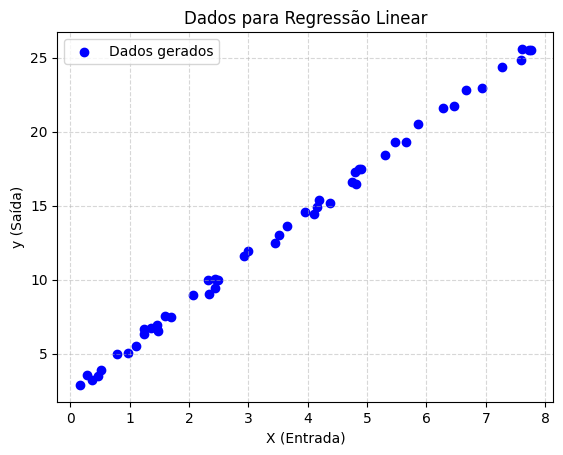

In [5]:
plt.scatter(X, y, color='blue', label='Dados gerados')

plt.title('Dados para Regressão Linear')
plt.xlabel('X (Entrada)')
plt.ylabel('y (Saída)')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

### Divisão Dados

In [10]:
treino = int(0.8 * len(X))

X_train = X[:treino]
y_train = y[:treino]

X_test = X[treino:]
y_test = y[treino:]

print(f"Tamanho do treino: {len(X_train)}, Tamanho do teste: {len(X_test)}")

Tamanho do treino: 40, Tamanho do teste: 10
